## How to load different datasets from pytorch

In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt

download_root = r"C:\Users\Shizh\OneDrive - Maastricht University\Data"

training_data = datasets.FashionMNIST(
    root=download_root,
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root=download_root,
    train=False,
    download=True,
    transform=ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 18835272.98it/s]


Extracting C:\Users\Shizh\OneDrive - Maastricht University\Data\FashionMNIST\raw\train-images-idx3-ubyte.gz to C:\Users\Shizh\OneDrive - Maastricht University\Data\FashionMNIST\raw



100%|██████████| 29515/29515 [00:00<00:00, 123685.92it/s]


Extracting C:\Users\Shizh\OneDrive - Maastricht University\Data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to C:\Users\Shizh\OneDrive - Maastricht University\Data\FashionMNIST\raw



100%|██████████| 4422102/4422102 [00:00<00:00, 10019550.12it/s]


Extracting C:\Users\Shizh\OneDrive - Maastricht University\Data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to C:\Users\Shizh\OneDrive - Maastricht University\Data\FashionMNIST\raw



100%|██████████| 5148/5148 [00:00<00:00, 32017.49it/s]


Extracting C:\Users\Shizh\OneDrive - Maastricht University\Data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to C:\Users\Shizh\OneDrive - Maastricht University\Data\FashionMNIST\raw



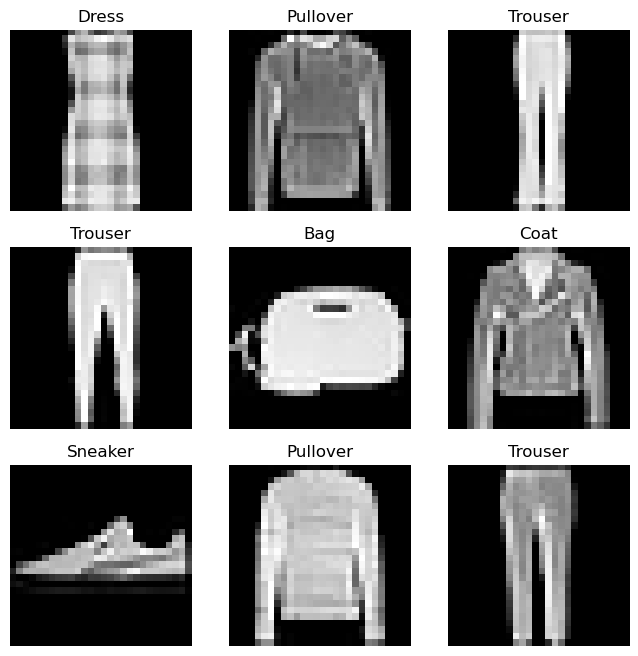

In [2]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [3]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


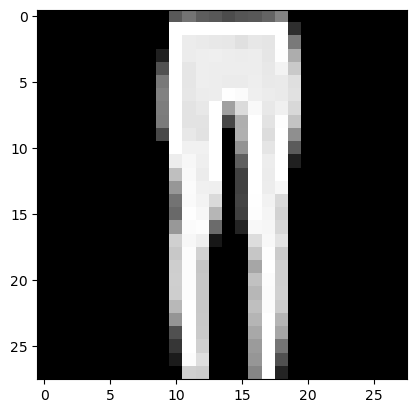

Label: 1


In [4]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

## How to customize the dataset
From pytorch official website, 
~~~
import os
import pandas as pd
from torchvision.io import read_image

class CustomImageDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None, target_transform=None):
        self.img_labels = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.img_labels.iloc[idx, 0])
        image = read_image(img_path)
        label = self.img_labels.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label
~~~

In [9]:
# first we need add the system path to this directory, so we can import the customized script
import sys
sys.path.append(r"C:\Users\Shizh\OneDrive - Maastricht University\Code\pytorch-tutorial-ViT")
from Dataset import hymenoptera_dataloaders
dataloaders, class_names, dataset_sizes = hymenoptera_dataloaders()
print(dataloaders)
print(class_names)
print(dataset_sizes)

{'train': 244, 'val': 153}
{'train': <torch.utils.data.dataloader.DataLoader object at 0x00000201ABA3E390>, 'val': <torch.utils.data.dataloader.DataLoader object at 0x00000201A58F3050>}
['ants', 'bees']
{'train': 244, 'val': 153}


**IMPORTANT:** if you want to use a different dataset, be sure to prepare the data with three different features:
1. the dataloaders -- a dict with 'train' and 'val' as keys
2. class_names -- a list includes all the class names with orders
3. dataset_size -- a dict with 'train' and 'val' as keys